In [1]:
%matplotlib inline


Hurricane Katrina
-----------------

This example uses the power of Shapely to illustrate states that are likely to
have been significantly impacted by Hurricane Katrina.




 38.33711814880373, -77.04810714721678 38.38050270080568, -77.00225319777159 38.2696178749585, -76.98989486694339 38.23973274230958, -76.30161857604979 37.91794776916503, -76.25873947143552 36.96640205383303, -75.9717998504639 36.89726066589358, -75.86807632446292 36.55117988586429, -75.86807671493635 36.55117988393773, -75.99324723587974 36.55056230063111, -76.94121551513672 36.54588508605955, -77.99954795837401 36.53743553161623, -79.9923973083496 36.54218864440918, -81.67937469482423 36.58557319641113, -82.0699013776389 36.57048320283537, -82.18632125854491 36.56598472595211, -83.67328453063968 36.59985923767088, -83.67328420892716 36.59985930073528, -83.38436126708986 36.6564960479736, -83.3305924391732 36.67266067364849, -83.17850875854489 36.71838188171382, -83.09948313934495 36.80443780607926, -83.08908271789547 36.81576347351071, -83.07335299713355 36.82260931048464, -82.81550788879393 36.93482780456544, -82.70913176984135 37.04014344295192, -82.70913124084477 37.04014396667485

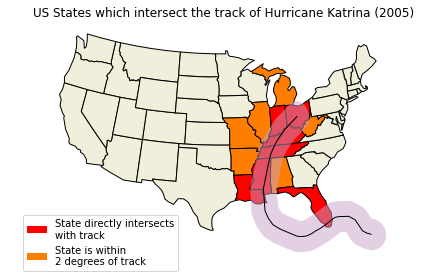

In [3]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import shapely.geometry as sgeom

import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader


def sample_data():
    """
    Return a list of latitudes and a list of longitudes (lons, lats)
    for Hurricane Katrina (2005).

    The data was originally sourced from the HURDAT2 dataset from AOML/NOAA:
    https://www.aoml.noaa.gov/hrd/hurdat/newhurdat-all.html on 14th Dec 2012.

    """
    lons = [-75.1, -75.7, -76.2, -76.5, -76.9, -77.7, -78.4, -79.0,
            -79.6, -80.1, -80.3, -81.3, -82.0, -82.6, -83.3, -84.0,
            -84.7, -85.3, -85.9, -86.7, -87.7, -88.6, -89.2, -89.6,
            -89.6, -89.6, -89.6, -89.6, -89.1, -88.6, -88.0, -87.0,
            -85.3, -82.9]

    lats = [23.1, 23.4, 23.8, 24.5, 25.4, 26.0, 26.1, 26.2, 26.2, 26.0,
            25.9, 25.4, 25.1, 24.9, 24.6, 24.4, 24.4, 24.5, 24.8, 25.2,
            25.7, 26.3, 27.2, 28.2, 29.3, 29.5, 30.2, 31.1, 32.6, 34.1,
            35.6, 37.0, 38.6, 40.1]

    return lons, lats


def main():
    fig = plt.figure()
    # to get the effect of having just the states without a map "background"
    # turn off the background patch and axes frame
    ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.LambertConformal(),
                      frameon=False)
    ax.patch.set_visible(False)

    ax.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic())

    shapename = 'admin_1_states_provinces_lakes_shp'
    states_shp = shpreader.natural_earth(resolution='110m',
                                         category='cultural', name=shapename)

    lons, lats = sample_data()

    ax.set_title('US States which intersect the track of '
                 'Hurricane Katrina (2005)')

    # turn the lons and lats into a shapely LineString
    track = sgeom.LineString(zip(lons, lats))

    # buffer the linestring by two degrees (note: this is a non-physical
    # distance)
    track_buffer = track.buffer(2)

    def colorize_state(geometry):
        print(geometry)
        facecolor = (0.9375, 0.9375, 0.859375)
        if geometry.intersects(track):
            facecolor = 'red'
        elif geometry.intersects(track_buffer):
            facecolor = '#FF7E00'
        return {'facecolor': facecolor, 'edgecolor': 'black'}

    ax.add_geometries(
        shpreader.Reader(states_shp).geometries(),
        ccrs.PlateCarree(),
        styler=colorize_state)

    ax.add_geometries([track_buffer], ccrs.PlateCarree(),
                      facecolor='#C8A2C8', alpha=0.5)
    ax.add_geometries([track], ccrs.PlateCarree(),
                      facecolor='none', edgecolor='k')

    # make two proxy artists to add to a legend
    direct_hit = mpatches.Rectangle((0, 0), 1, 1, facecolor="red")
    within_2_deg = mpatches.Rectangle((0, 0), 1, 1, facecolor="#FF7E00")
    labels = ['State directly intersects\nwith track',
              'State is within \n2 degrees of track']
    ax.legend([direct_hit, within_2_deg], labels,
              loc='lower left', bbox_to_anchor=(0.025, -0.1), fancybox=True)

    plt.show()


if __name__ == '__main__':
    main()

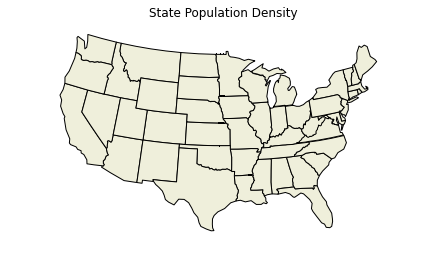

In [4]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.LambertConformal())

ax.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic())

shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='110m',
                                     category='cultural', name=shapename)

popdensity = {
    'New Jersey':  438.00,
    'Rhode Island':   387.35,
    'Massachusetts':   312.68,
    'Connecticut':    271.40,
    'Maryland':   209.23,
    'New York':    155.18,
    'Delaware':    154.87,
    'Florida':     114.43,
    'Ohio':  107.05,
    'Pennsylvania':  105.80,
    'Illinois':    86.27,
    'California':  83.85,
    'Virginia':    69.03,
    'Michigan':    67.55,
    'Indiana':    65.46,
    'North Carolina':  63.80,
    'Georgia':     54.59,
    'Tennessee':   53.29,
    'New Hampshire':   53.20,
    'South Carolina':  51.45,
    'Louisiana':   39.61,
    'Kentucky':   39.28,
    'Wisconsin':  38.13,
    'Washington':  34.20,
    'Alabama':     33.84,
    'Missouri':    31.36,
    'Texas':   30.75,
    'West Virginia':   29.00,
    'Vermont':     25.41,
    'Minnesota':  23.86,
    'Mississippi':   23.42,
    'Iowa':  20.22,
    'Arkansas':    19.82,
    'Oklahoma':    19.40,
    'Arizona':     17.43,
    'Colorado':    16.01,
    'Maine':  15.95,
    'Oregon':  13.76,
    'Kansas':  12.69,
    'Utah':  10.50,
    'Nebraska':    8.60,
    'Nevada':  7.03,
    'Idaho':   6.04,
    'New Mexico':  5.79,
    'South Dakota':  3.84,
    'North Dakota':  3.59,
    'Montana':     2.39,
    'Wyoming':      1.96}

ax.background_patch.set_visible(False)
ax.outline_patch.set_visible(False)

ax.set_title('State Population Density')

for state in shpreader.Reader(states_shp).geometries():

    ### I need to replace the following code with code that sets the
    ### facecolor as a gradient based on the population density above
    facecolor = [0.9375, 0.9375, 0.859375]
    edgecolor = 'black'

    ax.add_geometries([state], ccrs.PlateCarree(),
                      facecolor=facecolor, edgecolor=edgecolor)

plt.show()

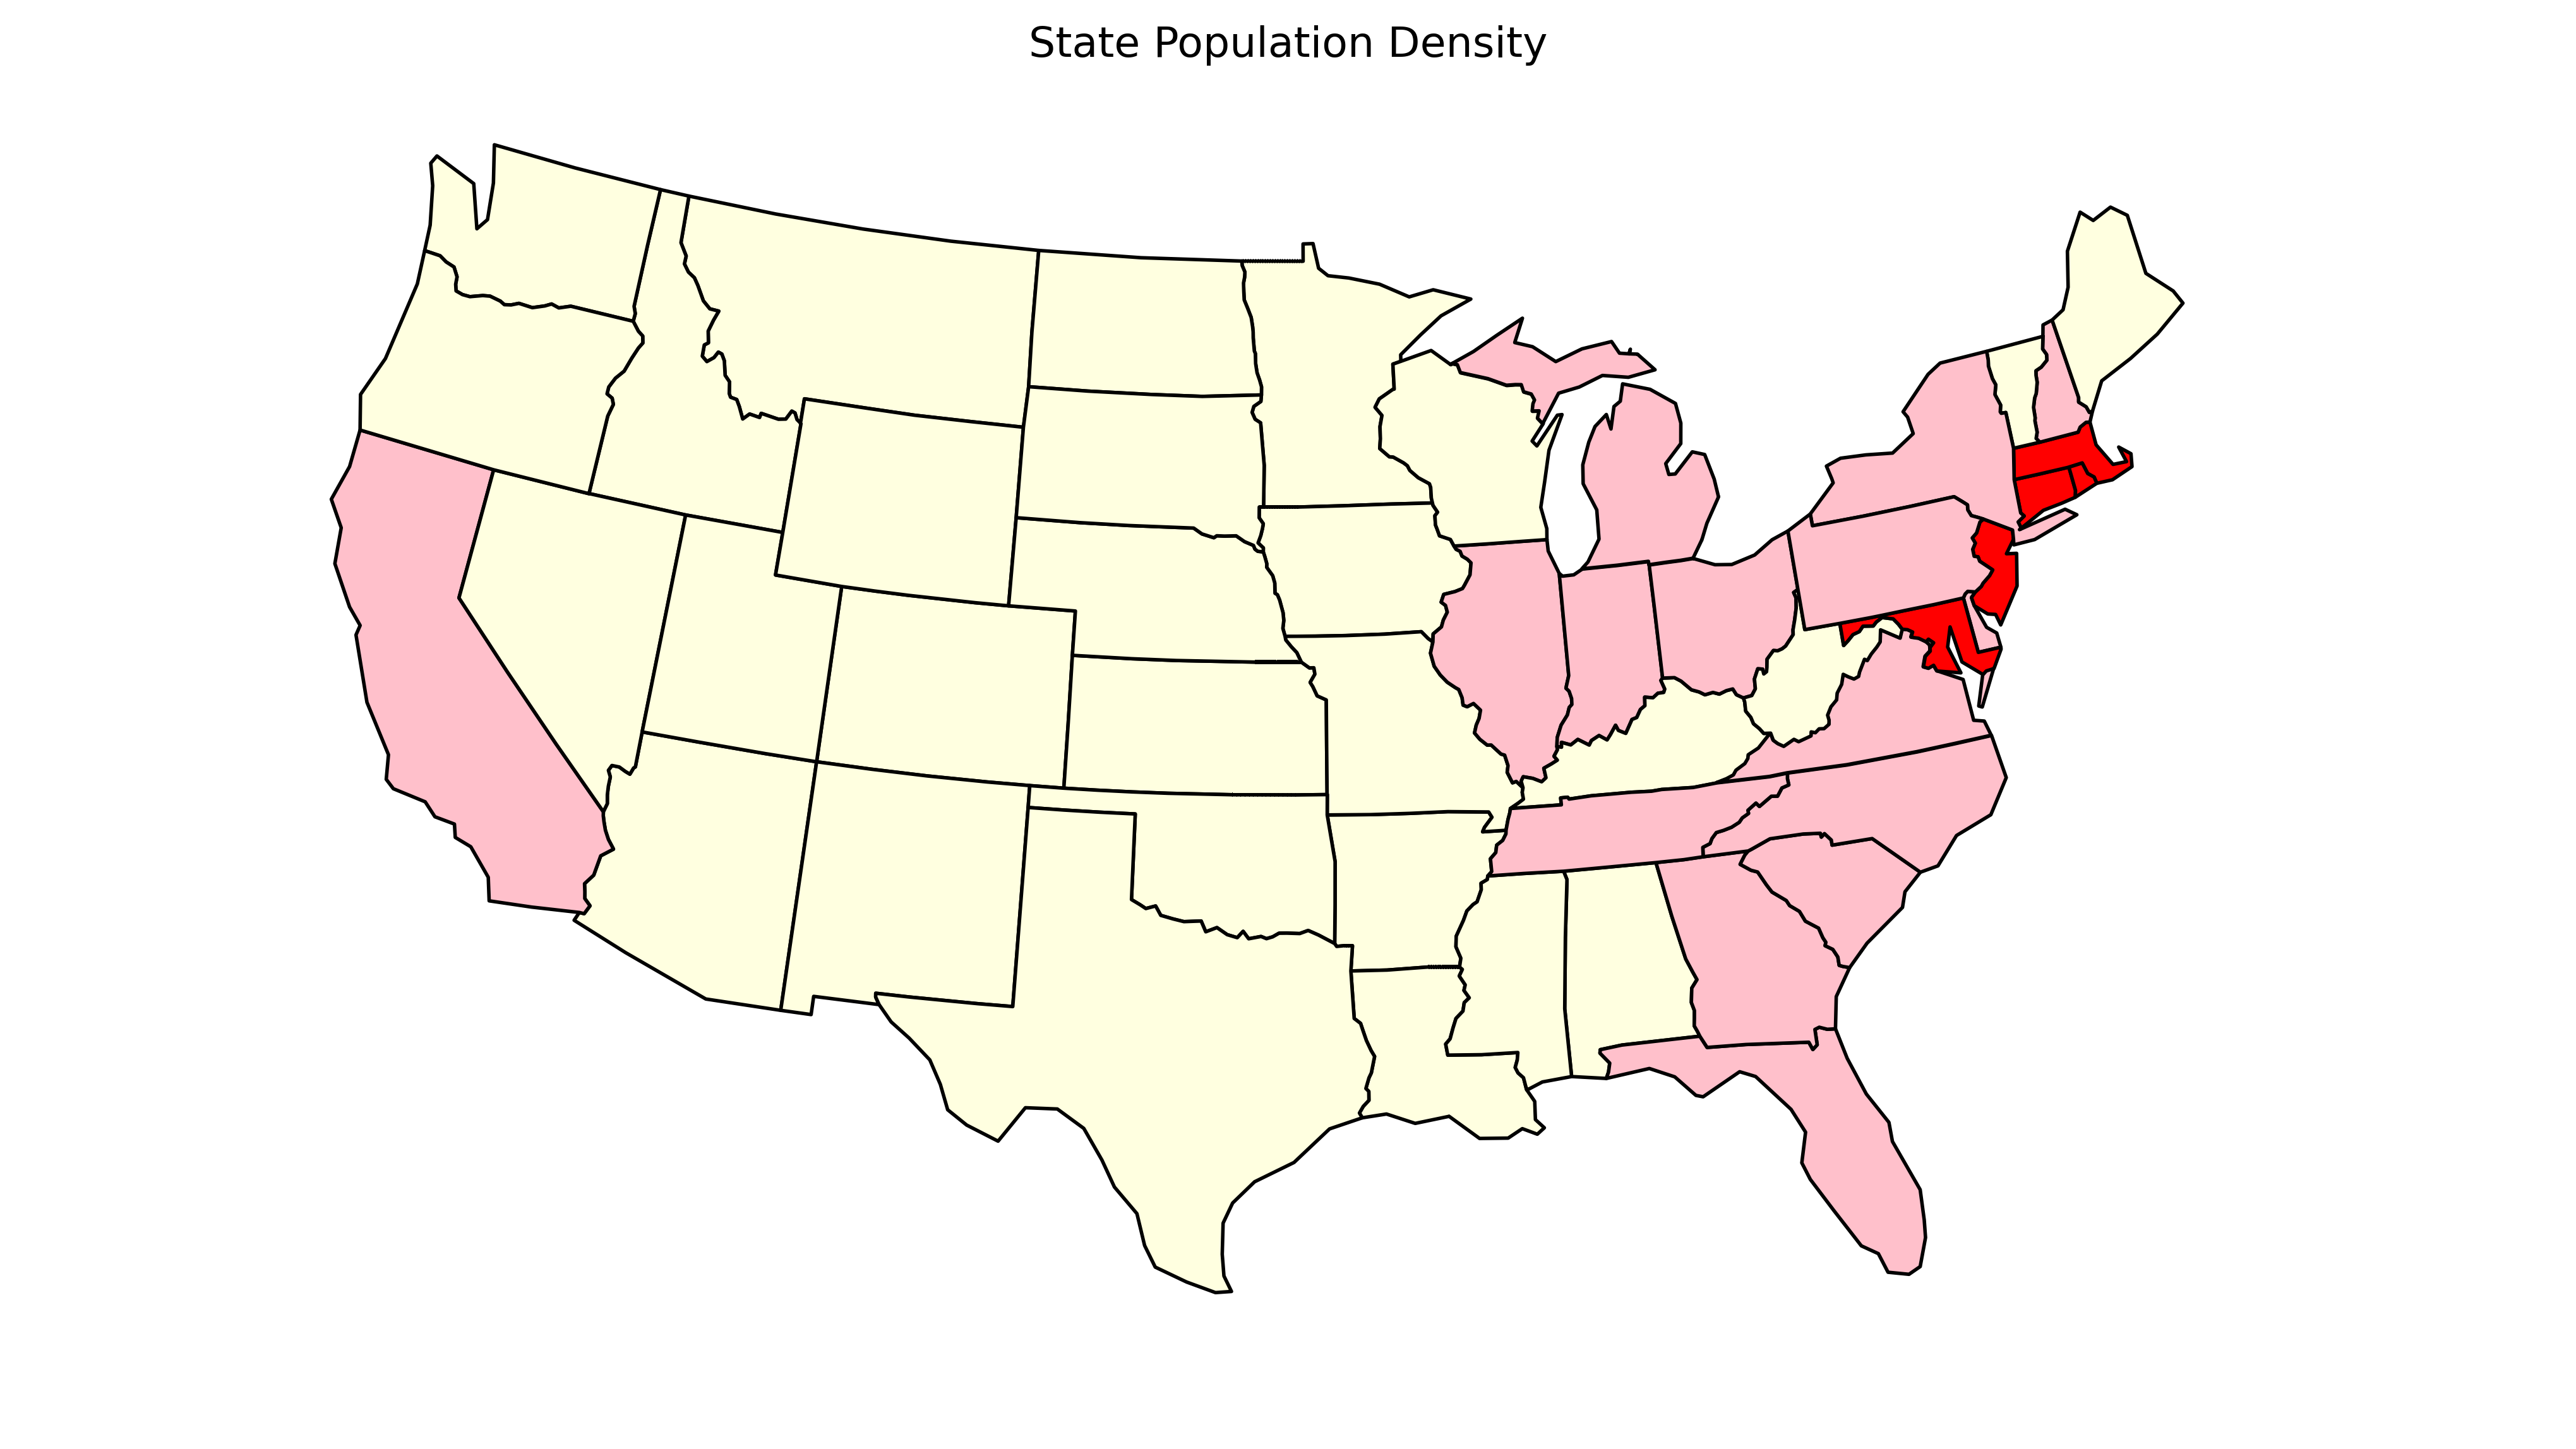

In [6]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader

fig = plt.figure(figsize=(10,10), dpi=400)
ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.LambertConformal())

ax.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic())

shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='110m',
                                     category='cultural', name=shapename)

popdensity = {
    'New Jersey':  438.00,
    'Rhode Island':   387.35,
    'Massachusetts':   312.68,
    'Connecticut':    271.40,
    'Maryland':   209.23,
    'New York':    155.18,
    'Delaware':    154.87,
    'Florida':     114.43,
    'Ohio':  107.05,
    'Pennsylvania':  105.80,
    'Illinois':    86.27,
    'California':  83.85,
    'Virginia':    69.03,
    'Michigan':    67.55,
    'Indiana':    65.46,
    'North Carolina':  63.80,
    'Georgia':     54.59,
    'Tennessee':   53.29,
    'New Hampshire':   53.20,
    'South Carolina':  51.45,
    'Louisiana':   39.61,
    'Kentucky':   39.28,
    'Wisconsin':  38.13,
    'Washington':  34.20,
    'Alabama':     33.84,
    'Missouri':    31.36,
    'Texas':   30.75,
    'West Virginia':   29.00,
    'Vermont':     25.41,
    'Minnesota':  23.86,
    'Mississippi':   23.42,
    'Iowa':  20.22,
    'Arkansas':    19.82,
    'Oklahoma':    19.40,
    'Arizona':     17.43,
    'Colorado':    16.01,
    'Maine':  15.95,
    'Oregon':  13.76,
    'Kansas':  12.69,
    'Utah':  10.50,
    'Nebraska':    8.60,
    'Nevada':  7.03,
    'Idaho':   6.04,
    'New Mexico':  5.79,
    'South Dakota':  3.84,
    'North Dakota':  3.59,
    'Montana':     2.39,
    'Wyoming':      1.96}

ax.background_patch.set_visible(False)
ax.outline_patch.set_visible(False)

ax.set_title('State Population Density')

#for state in shpreader.Reader(states_shp).geometries():
for astate in shpreader.Reader(states_shp).records():

    ### You want to replace the following code with code that sets the
    ### facecolor as a gradient based on the population density above
    #facecolor = [0.9375, 0.9375, 0.859375]

    edgecolor = 'black'

    try:
        # use the name of this state to get pop_density
        state_dens = popdensity[ astate.attributes['name'] ]
    except:
        state_dens = 0

    # simple scheme to assign color to each state
    if state_dens < 40:
        facecolor = "lightyellow"
    elif state_dens > 200:
        facecolor = "red"
    else:
        facecolor = "pink"

    # `astate.geometry` is the polygon to plot
    ax.add_geometries([astate.geometry], ccrs.PlateCarree(),
                      facecolor=facecolor, edgecolor=edgecolor)

plt.show()